<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [370]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [371]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [372]:
train_df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test.csv')
submission_df = pd.read_csv(r'submission.csv')

In [373]:
train_df['TotalSpent'] = train_df['TotalSpent'].replace(' ', np.nan)
test_df['TotalSpent'] = test_df['TotalSpent'].replace(' ', np.nan)

In [374]:
# создаем датафрейм, в котором указываем количество NaN объектов в train_df
data_dict = {}
for column_name in train_df.columns:
    data_dict[column_name] = pd.Series(data=[train_df[column_name].shape[0]-train_df[column_name].isna().value_counts()[False]],
                                      index=['number_of_NaN_objects'])

nan_in_train_df = pd.DataFrame(data=data_dict)
nan_in_train_df

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
number_of_NaN_objects,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [375]:
# создаем датафрейм, в котором указываем количество NaN объектов в test_df
data_dict = {}
for column_name in test_df.columns:
    data_dict[column_name] = pd.Series(data=[test_df[column_name].shape[0]-test_df[column_name].isna().value_counts()[False]],
                                      index=['number_of_NaN_objects'])

nan_in_test_df = pd.DataFrame(data=data_dict)
nan_in_test_df

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
number_of_NaN_objects,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [376]:
train_df['TotalSpent'] = train_df['TotalSpent'].astype('float64')
test_df['TotalSpent'] = test_df['TotalSpent'].astype('float64')

In [377]:
# избавляемся от nan-ов
train_df = train_df.dropna()
test_df = test_df.fillna(value=test_df['TotalSpent'].mean(skipna=True))

In [378]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [379]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [380]:
# переводим колонку к типу float
train_df[num_cols[2]] = train_df[num_cols[2]].astype('float')
test_df[num_cols[2]] = test_df[num_cols[2]].astype('float')


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [381]:
# имя для аргумента на графиках
x_label = 'objects'

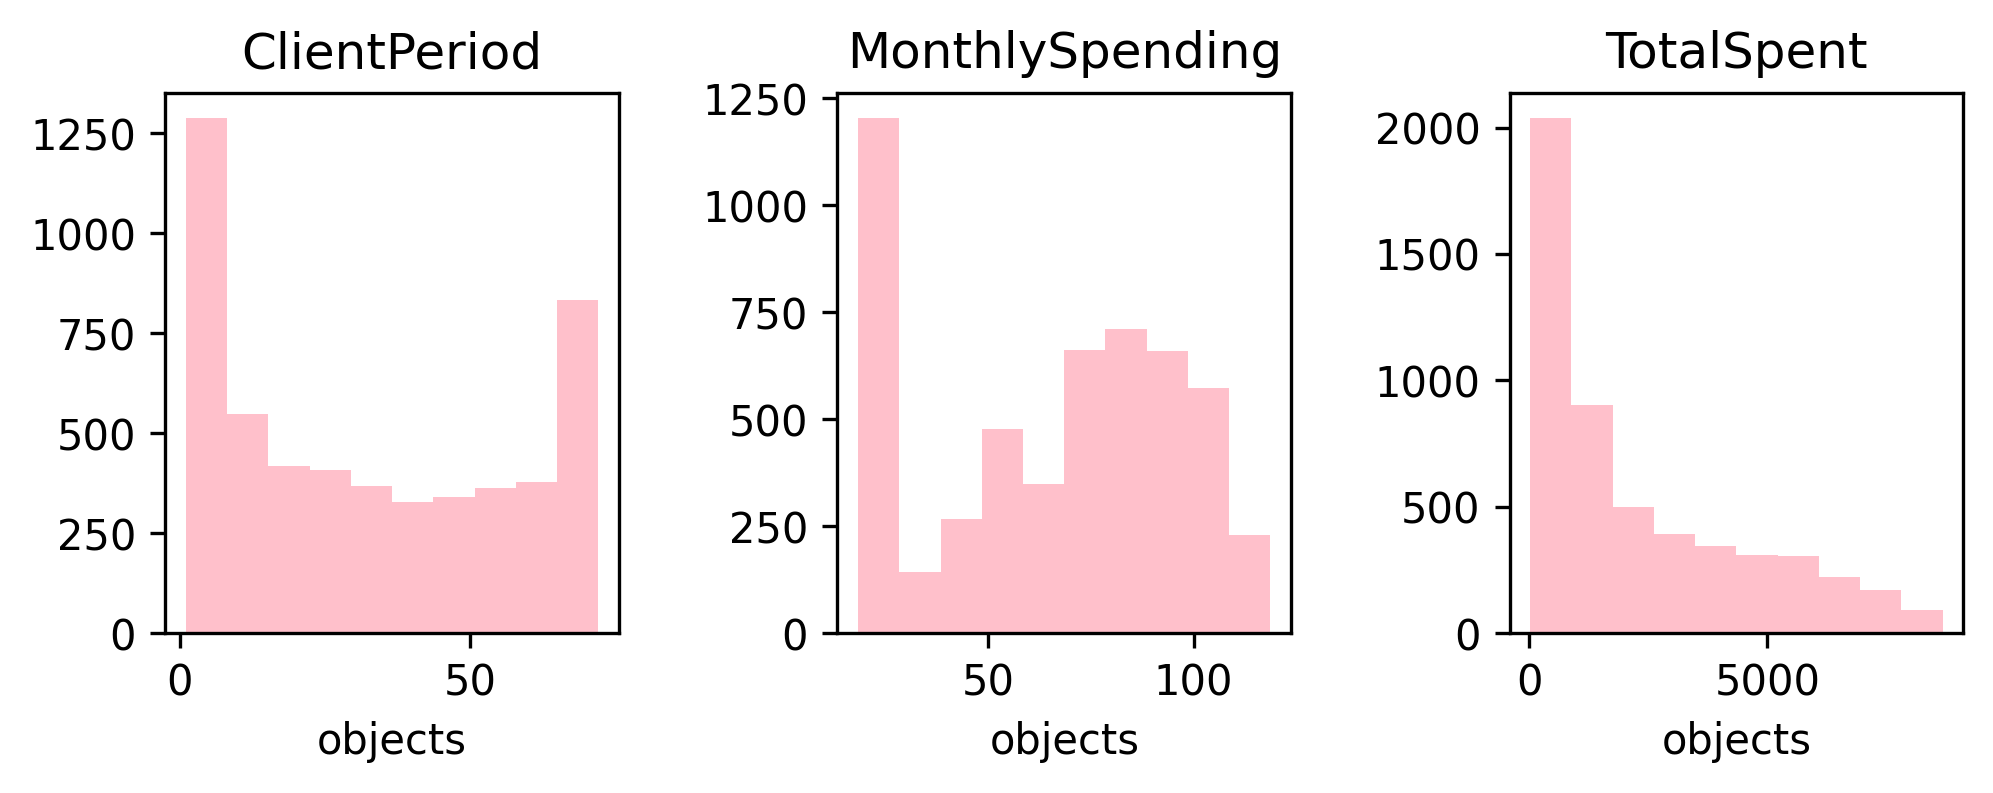

In [382]:
# строим графики числовых признаков
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(7,3), dpi=300)


for ax, column_name in zip(axes.flatten(), num_cols):
    ax.hist(list(train_df[column_name]), color='pink')
    
    ax.set_title(column_name)
    ax.set_xlabel(x_label)

    
fig.tight_layout(pad=2)
plt.show()

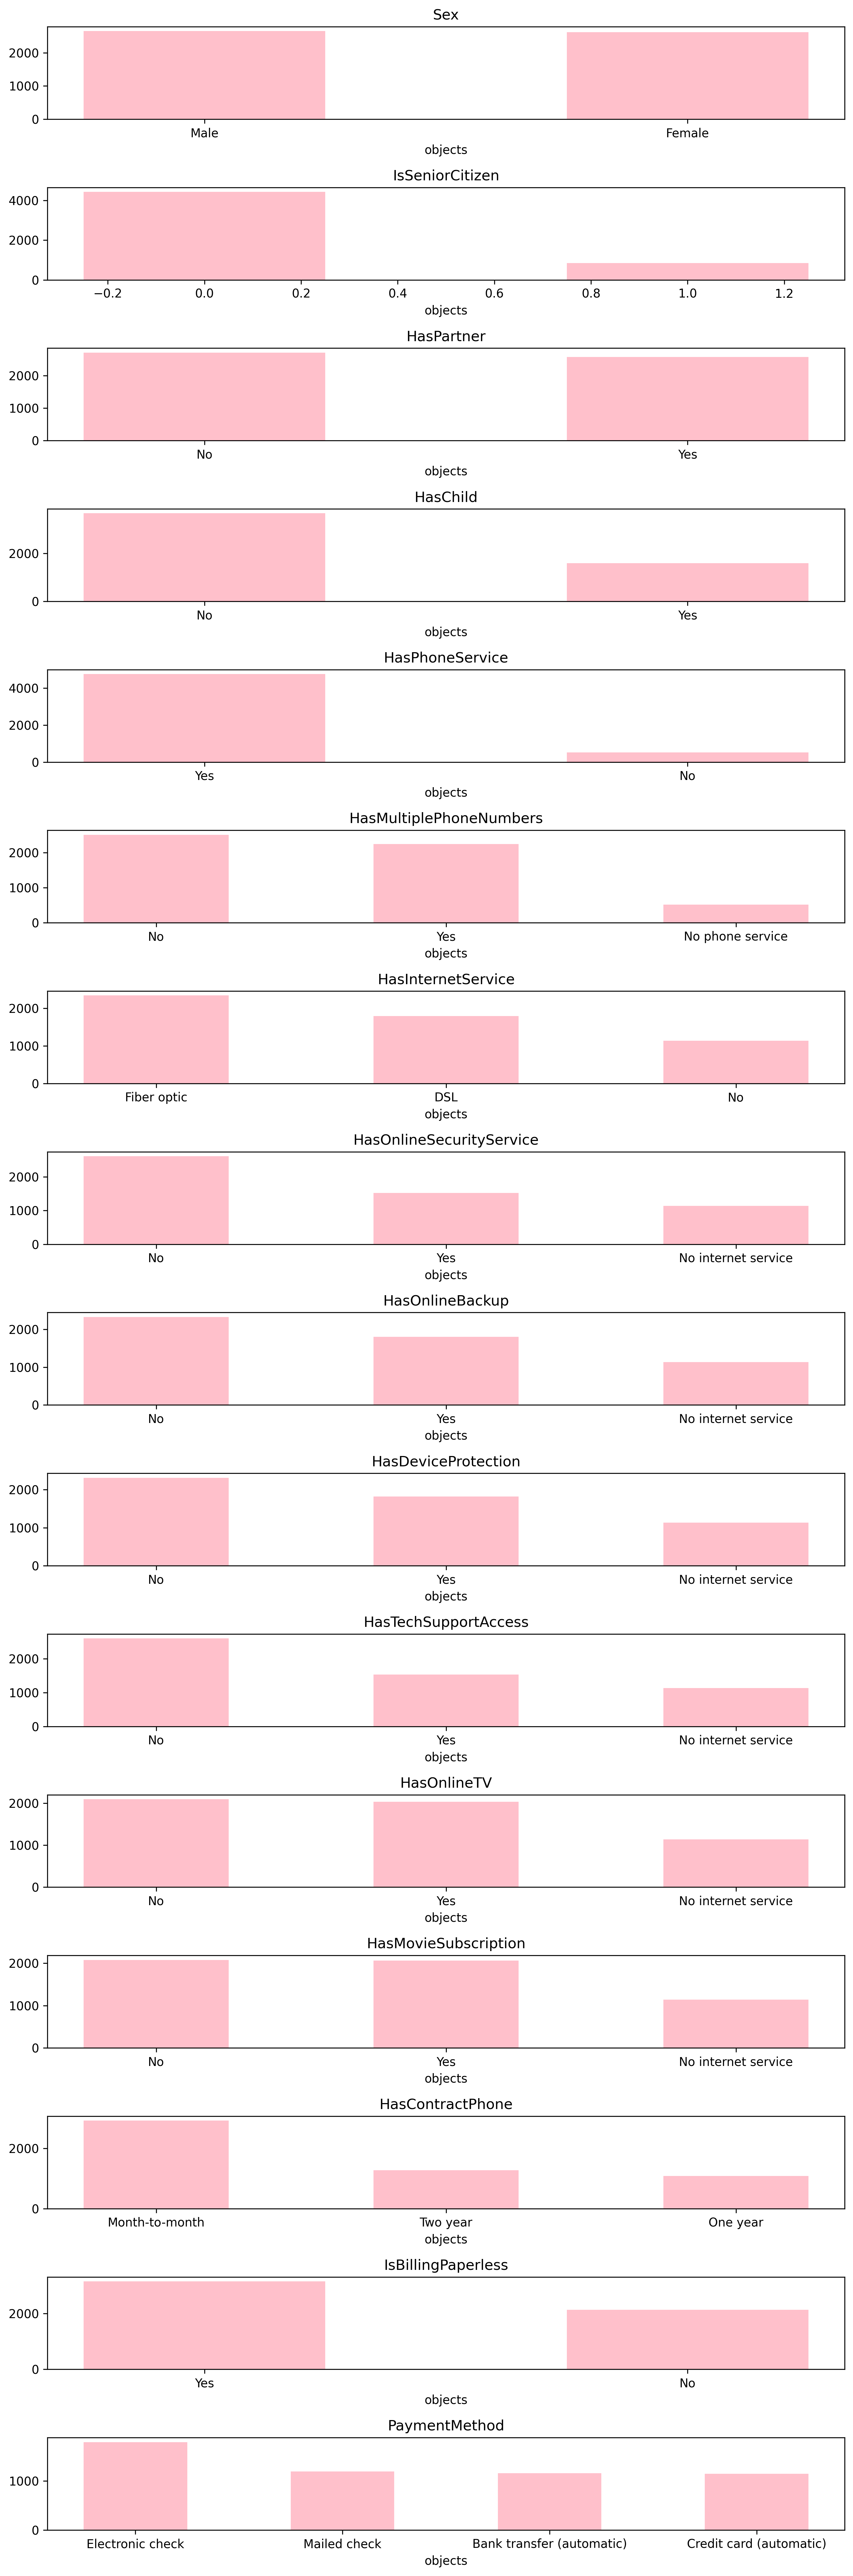

In [383]:
# строим графики категориальных признаков
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,30), dpi=300)

for column_name, ax in zip(cat_cols, axes):
    indexes = train_df[column_name].value_counts().index
    values = train_df[column_name].value_counts().values
    
    ax.bar(list(indexes), list(values), color='pink', width=0.5)
    ax.set_title(column_name)
    ax.set_xlabel(x_label)
    
fig.tight_layout()
plt.show()

In [384]:
#Данные категориальных признаков очень сбалансированные.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [385]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score
from catboost import CatBoostClassifier



In [386]:
for column_name in feature_cols:
    t = train_df[column_name].dtype
    
    if t == 'object':
        test_df[column_name] = test_df[column_name].astype('str')
    
    if t == 'int64':
        test_df[column_name] = test_df[column_name].astype('int')
    
    if t == 'float64':
        test_df[column_name] = test_df[column_name].astype('str')
    
    t = train_df[column_name].dtype
    
    if t == 'object':
        train_df[column_name] = train_df[column_name].astype('str')
    
    if t == 'int64':
        train_df[column_name] = train_df[column_name].astype('int')
    
    if t == 'float64':
        train_df[column_name] = train_df[column_name].astype('str')
    

In [387]:
# разделяем данные на признаки и таргеты 
target_df = train_df[target_col]
train_df = train_df[feature_cols]

In [388]:
train_df.columns

Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Sex',
       'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod'],
      dtype='object')

In [389]:
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.2)

In [390]:
cat_cols_id_list = [count for count, column in enumerate(train_df.columns) if column in cat_cols]
cat_cols_id_list = np.array(cat_cols_id_list).astype('int')
cat_cols_id_list

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [391]:
def print_metrics(y_preds, y):
    print(f'Roc-auc: {roc_auc_score(y, y_preds)}')

In [392]:
best_model = CatBoostClassifier(n_estimators=500, cat_features=cat_cols)


In [393]:
best_model.fit(
   X_train, y_train
)

Learning rate set to 0.035967
0:	learn: 0.6716503	total: 42.1ms	remaining: 21s
1:	learn: 0.6525158	total: 88ms	remaining: 21.9s
2:	learn: 0.6349829	total: 135ms	remaining: 22.3s
3:	learn: 0.6192308	total: 183ms	remaining: 22.6s
4:	learn: 0.6045706	total: 226ms	remaining: 22.4s
5:	learn: 0.5915279	total: 272ms	remaining: 22.4s
6:	learn: 0.5770680	total: 322ms	remaining: 22.7s
7:	learn: 0.5657990	total: 342ms	remaining: 21s
8:	learn: 0.5539967	total: 386ms	remaining: 21.1s
9:	learn: 0.5448533	total: 406ms	remaining: 19.9s
10:	learn: 0.5348905	total: 454ms	remaining: 20.2s
11:	learn: 0.5254701	total: 500ms	remaining: 20.3s
12:	learn: 0.5168344	total: 555ms	remaining: 20.8s
13:	learn: 0.5101453	total: 603ms	remaining: 20.9s
14:	learn: 0.5025271	total: 646ms	remaining: 20.9s
15:	learn: 0.4959700	total: 691ms	remaining: 20.9s
16:	learn: 0.4899992	total: 736ms	remaining: 20.9s
17:	learn: 0.4843617	total: 777ms	remaining: 20.8s
18:	learn: 0.4790581	total: 851ms	remaining: 21.5s
19:	learn: 0.47

161:	learn: 0.3859310	total: 7.04s	remaining: 14.7s
162:	learn: 0.3857365	total: 7.09s	remaining: 14.7s
163:	learn: 0.3854524	total: 7.13s	remaining: 14.6s
164:	learn: 0.3854417	total: 7.15s	remaining: 14.5s
165:	learn: 0.3854306	total: 7.19s	remaining: 14.5s
166:	learn: 0.3852744	total: 7.24s	remaining: 14.4s
167:	learn: 0.3850689	total: 7.28s	remaining: 14.4s
168:	learn: 0.3850513	total: 7.31s	remaining: 14.3s
169:	learn: 0.3850393	total: 7.32s	remaining: 14.2s
170:	learn: 0.3848955	total: 7.37s	remaining: 14.2s
171:	learn: 0.3847732	total: 7.41s	remaining: 14.1s
172:	learn: 0.3845376	total: 7.45s	remaining: 14.1s
173:	learn: 0.3844416	total: 7.5s	remaining: 14s
174:	learn: 0.3843547	total: 7.54s	remaining: 14s
175:	learn: 0.3840768	total: 7.6s	remaining: 14s
176:	learn: 0.3840530	total: 7.63s	remaining: 13.9s
177:	learn: 0.3840289	total: 7.66s	remaining: 13.9s
178:	learn: 0.3840279	total: 7.67s	remaining: 13.8s
179:	learn: 0.3837221	total: 7.71s	remaining: 13.7s
180:	learn: 0.383518

321:	learn: 0.3597005	total: 14.3s	remaining: 7.88s
322:	learn: 0.3592798	total: 14.3s	remaining: 7.83s
323:	learn: 0.3591093	total: 14.4s	remaining: 7.8s
324:	learn: 0.3588686	total: 14.4s	remaining: 7.76s
325:	learn: 0.3584846	total: 14.5s	remaining: 7.71s
326:	learn: 0.3583441	total: 14.5s	remaining: 7.67s
327:	learn: 0.3580260	total: 14.5s	remaining: 7.63s
328:	learn: 0.3579102	total: 14.6s	remaining: 7.58s
329:	learn: 0.3575926	total: 14.6s	remaining: 7.54s
330:	learn: 0.3574724	total: 14.7s	remaining: 7.5s
331:	learn: 0.3574116	total: 14.8s	remaining: 7.47s
332:	learn: 0.3573068	total: 14.8s	remaining: 7.42s
333:	learn: 0.3571311	total: 14.8s	remaining: 7.38s
334:	learn: 0.3570246	total: 14.9s	remaining: 7.35s
335:	learn: 0.3566791	total: 15s	remaining: 7.3s
336:	learn: 0.3563799	total: 15s	remaining: 7.26s
337:	learn: 0.3562463	total: 15.1s	remaining: 7.21s
338:	learn: 0.3561180	total: 15.1s	remaining: 7.17s
339:	learn: 0.3560105	total: 15.1s	remaining: 7.12s
340:	learn: 0.35590

484:	learn: 0.3339843	total: 22.2s	remaining: 688ms
485:	learn: 0.3338294	total: 22.3s	remaining: 642ms
486:	learn: 0.3337561	total: 22.3s	remaining: 596ms
487:	learn: 0.3335492	total: 22.4s	remaining: 550ms
488:	learn: 0.3333324	total: 22.4s	remaining: 505ms
489:	learn: 0.3329812	total: 22.5s	remaining: 459ms
490:	learn: 0.3327348	total: 22.5s	remaining: 413ms
491:	learn: 0.3325715	total: 22.6s	remaining: 367ms
492:	learn: 0.3324337	total: 22.6s	remaining: 321ms
493:	learn: 0.3323657	total: 22.7s	remaining: 275ms
494:	learn: 0.3322946	total: 22.7s	remaining: 229ms
495:	learn: 0.3321964	total: 22.8s	remaining: 184ms
496:	learn: 0.3321345	total: 22.8s	remaining: 138ms
497:	learn: 0.3320828	total: 22.9s	remaining: 91.8ms
498:	learn: 0.3319619	total: 22.9s	remaining: 45.9ms
499:	learn: 0.3318491	total: 23s	remaining: 0us


In [394]:
print('Resulting tree count:', best_model.tree_count_)


Resulting tree count: 500


In [395]:
a = best_model.predict_proba(X_test)[:,1]

In [397]:
print_metrics(a, y_test)

Roc-auc: 0.8542050702661989


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# YOUR CODE

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [398]:
submission = pd.read_csv('./submission.csv', index_col='Id')
submission['Churn'] = best_model.predict_proba(test_df)[:, 1].astype('float')
submission.to_csv('./my_submission.csv')
print('yep')

yep


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.